In [1]:
%%capture
!pip install tabulate
!pip install pycocotools

In [1]:
%load_ext autoreload
%autoreload 2

import glob
import numpy as np
import random
from functools import reduce
import matplotlib.pyplot as plt
from operator import concat
from torchvision import transforms as TR
from torchvision import datasets, transforms
from torch.utils.data import ChainDataset, DataLoader, Sampler
from torch.utils.data.dataset import ConcatDataset
import torchvision
import torch
from tqdm import tqdm
import torch.nn.functional as F
from collections import defaultdict
import torch.nn as nn
import importlib
import pandas as pd
from Experiment1 import *

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
config_file = 'config.yaml'

with open(config_file) as cf_file:
    config = yaml.safe_load( cf_file.read())

In [3]:
random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
np.random.seed(1)

In [4]:
# config revision

datasets_path = importlib.import_module('data_loaders.'+config['stage_2']['expert_dataset']['combined'])
datasets_class = config['stage_2']['expert_dataset']['combined']
datasets_file = getattr(datasets_path, datasets_class)

dataloader_buffer = datasets_file(config_file)
dataloader_train = dataloader_buffer.getDataloader("train")
dataloader_val = dataloader_buffer.getDataloader("val")
dataloader_test = dataloader_buffer.getDataloader("test")

flower train size:  322
dataset_combined_train size:15322
dataset_combined_val size:3100
dataset_combined_test size:3100


In [5]:
# datasets_file = 'data_loaders.'+config['stage_2']['expert_dataset']['combined']
# dataloader_train = importlib.import_module(datasets_file).dataloader_train
# dataloader_val = importlib.import_module(datasets_file).dataloader_val
# dataloader_test = importlib.import_module(datasets_file).dataloader_test

dataset_combined_train size:12322
dataset_combined_val size:4100
dataset_combined_test size:4100


In [5]:
model = Experiment1(config_file)

inovked utils


/opt/conda/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


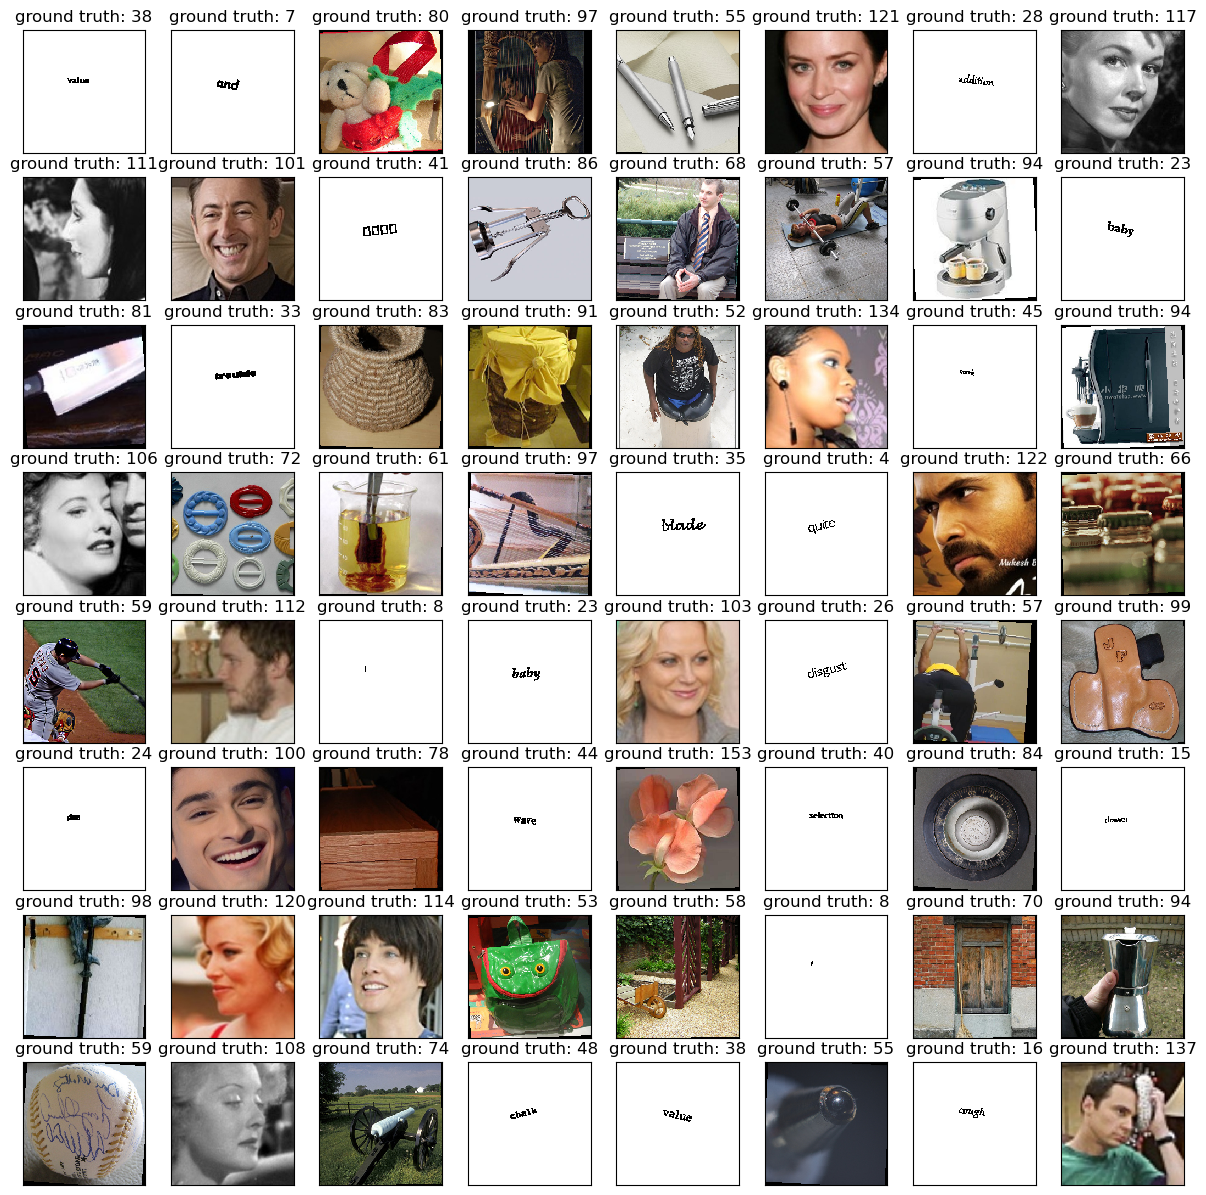

In [6]:
model.visualize_example_batch(dataloader_train,64)

In [ ]:
model.training_stage2(dataloader_train,dataloader_val)

  0%|                                                                             | 0/50 [00:00<?, ?it/s]

 ------epoch:0------

-------gate layer:1-------
--------------  -------------------  --------------------  ---------------------
Dataset         Gate1                Gate2                 Gate3
Words           0.9924246706506128   0.004349106983257449  0.0029762854642441387
Objects         0.11906895752953542  0.008456156153903839  0.872224949605943
Faces           0.01343089822859256  0.003701404533843767  0.982617762146466
Expert Dataset  0.03738782529862707  0.003929512025189402  0.955586687490148
--------------  -------------------  --------------------  ---------------------
-------gate layer:2-------
--------------  -------------------  -------------------  -------------------
Dataset         Gate1                Gate2                Gate3
Words           0.7736316113003013   0.12068290749885527  0.10543554347398128
Objects         0.08413240055196657  0.2962565154333488   0.619361145504264
Faces           0.04571200220973548  0.7876764846422379   0.16636157555142975
Expert Data

  2%|█▎                                                                | 1/50 [02:21<1:55:29, 141.41s/it]

Validation Accuracy 0.2226829268292683


 ------epoch:1------

-------gate layer:1-------
--------------  --------------------  ----------------------  ---------------------
Dataset         Gate1                 Gate2                   Gate3
Words           0.9986038770237079    9.506493942403937e-05   0.0010511214571578534
Objects         0.09230884904254733   0.001076427042050378    0.9063647876370583
Faces           0.003979271634576791  4.9536377951622874e-05  0.9957212571820984
Expert Dataset  0.019407246471139273  0.00016524015791333422  0.9773315408356464
--------------  --------------------  ----------------------  ---------------------
-------gate layer:2-------
--------------  --------------------  --------------------  --------------------
Dataset         Gate1                 Gate2                 Gate3
Words           0.9527060597040032    0.021291233318258693  0.025752771455201936
Objects         0.028489066276927186  0.19832165187592402   0.7729393441478659
Faces        

  4%|██▋                                                               | 2/50 [04:39<1:51:23, 139.23s/it]

Validation Accuracy 0.24609756097560975


 ------epoch:2------

-------gate layer:1-------
--------------  ---------------------  ----------------------  --------------------
Dataset         Gate1                  Gate2                   Gate3
Words           0.9976347200246609     0.00010429904809162901  0.002011044154192972
Objects         0.0748054114419127     0.000922565135549503    0.9240220880400498
Faces           0.0025423507868403156  3.092521595331251e-05   0.9971767902202947
Expert Dataset  0.01072472717488852    0.00010997815103579444  0.9860693248502057
--------------  ---------------------  ----------------------  --------------------
-------gate layer:2-------
--------------  ---------------------  --------------------  -------------------
Dataset         Gate1                  Gate2                 Gate3
Words           0.9783445618296229     0.008639926389250806  0.01276557393741236
Objects         0.018985790187513264   0.16619317405150175   0.8145710988032151
Faces 

  6%|███▉                                                              | 3/50 [06:54<1:47:39, 137.43s/it]

Validation Accuracy 0.2697560975609756


 ------epoch:3------

-------gate layer:1-------
--------------  ---------------------  ----------------------  ---------------------
Dataset         Gate1                  Gate2                   Gate3
Words           0.9973767507943294     9.23956928796366e-05    0.0022809146877741174
Objects         0.07173358046464108    0.0008590031491790079   0.9271574807252062
Faces           0.0028955507456005433  3.3365127553685275e-05  0.99682115037362
Expert Dataset  0.007167706650261012   9.168878792414411e-05   0.9896446342231134
--------------  ---------------------  ----------------------  ---------------------
-------gate layer:2-------
--------------  ---------------------  ---------------------  -------------------
Dataset         Gate1                  Gate2                  Gate3
Words           0.9867272920174707     0.0048428576169595745  0.00817991287715026
Objects         0.015565868906171978   0.15155817007735345    0.8326260227476305
Fa

  8%|█████▎                                                            | 4/50 [09:08<1:44:16, 136.01s/it]

In [ ]:
model.test_stage2(dataloader_test)